🧪 Starting HierarchicalClustering Test Suite

📊 Generating test datasets...
✅ Blob dataset: (100, 5)
✅ Gene dataset: (60, 50)
✅ Distance matrix: (100, 100)

🔬 Testing basic clustering functionality...
..cutHeight not given, setting it to 123.8488341282264  ===>  99% of the (truncated) height range in dendro.
..done.
Ward clustering: 4 clusters
Complete clustering: 9 clusters
Average clustering (3 clusters): 3 clusters
Distance matrix clustering: 17 clusters

📈 Testing metadata tracks...
..cutHeight not given, setting it to 50.923040928386456  ===>  99% of the (truncated) height range in dendro.
..done.
Gene clustering: 3 clusters
Added 3 metadata tracks: ['Age', 'Gender', 'Treatment']

🎨 Creating visualizations...


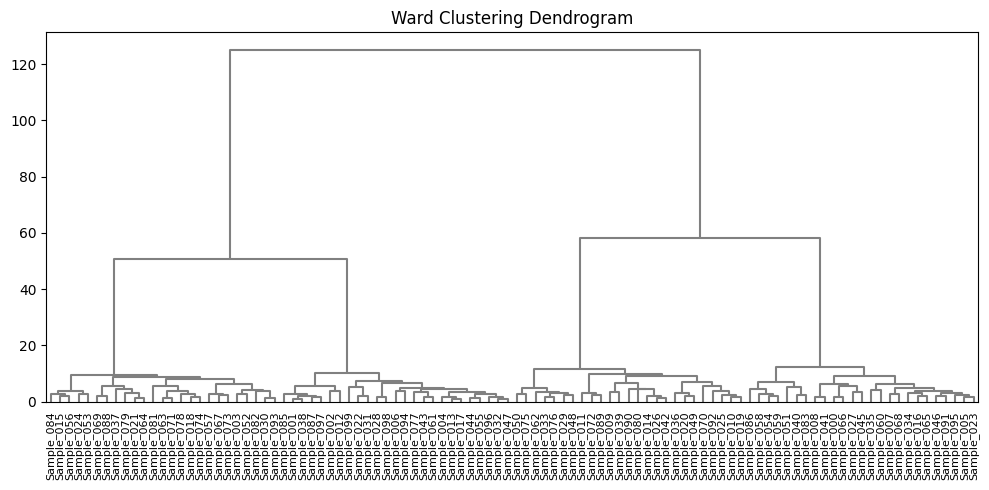

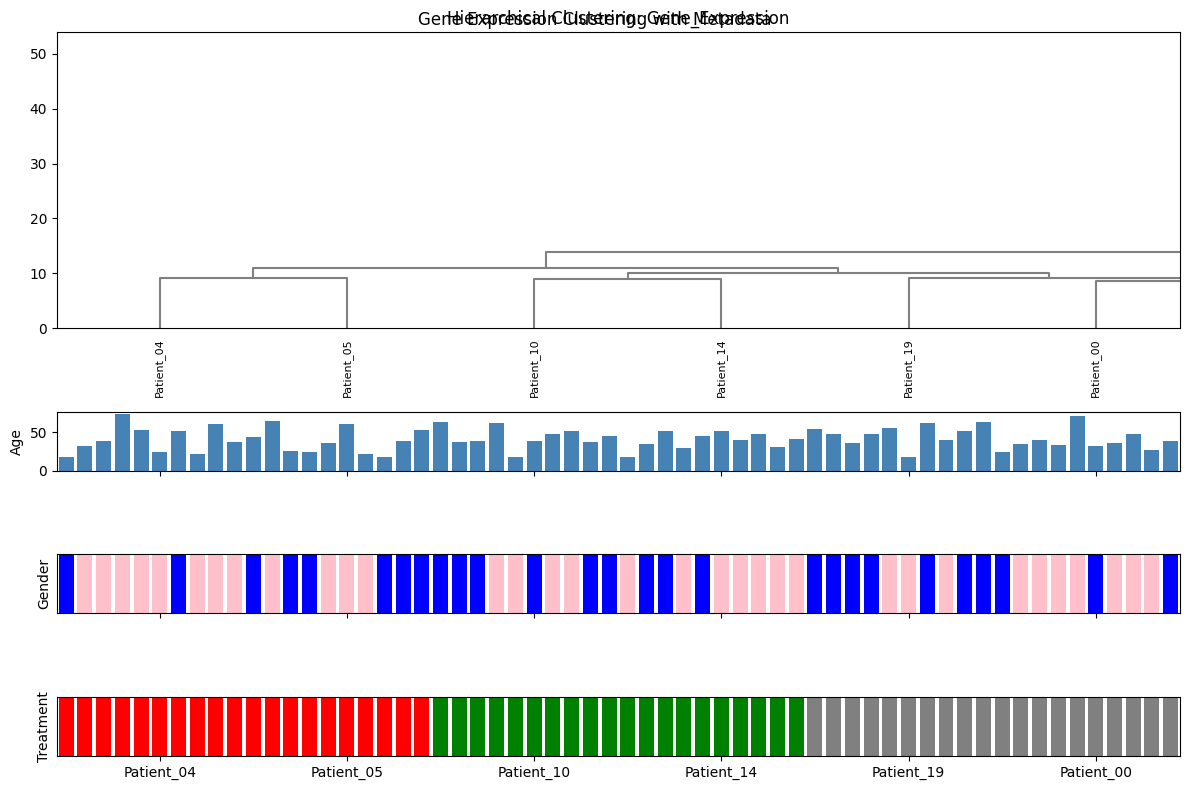


🧬 Calculating eigenprofiles...
Eigenprofiles calculated for 3 clusters


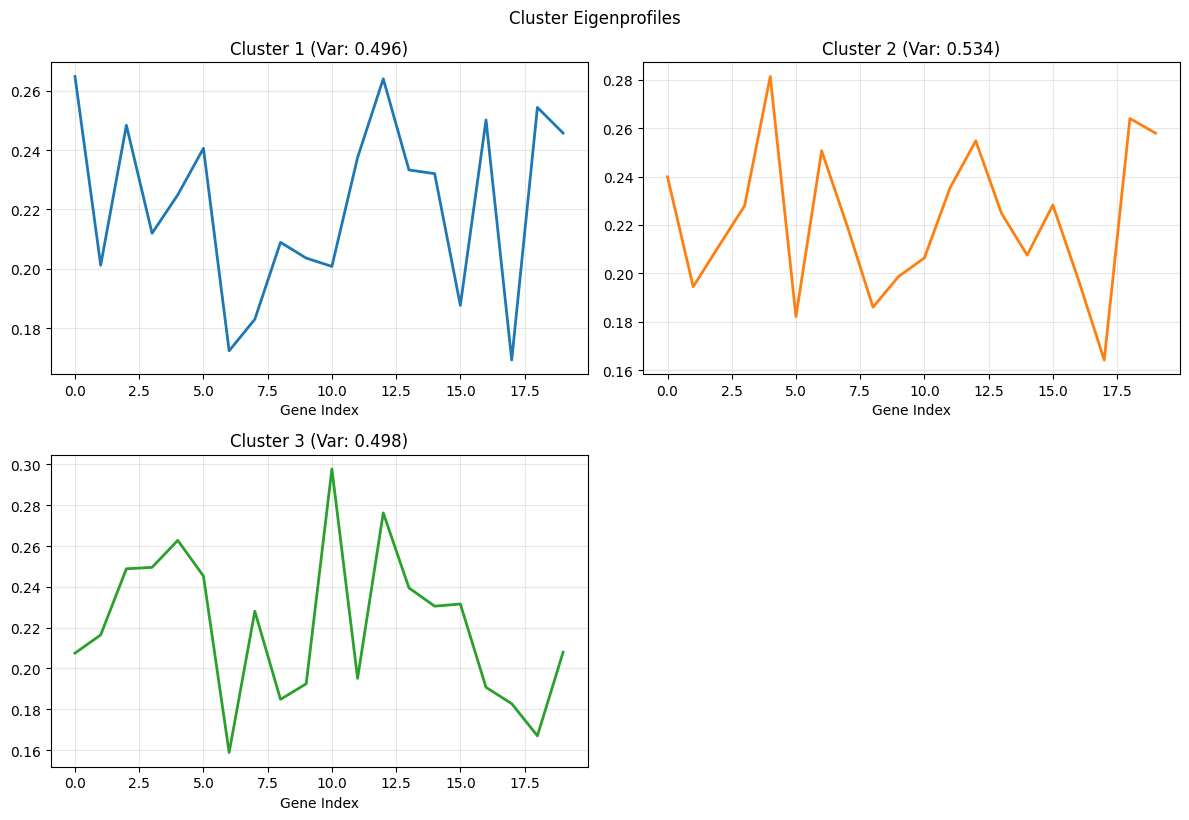


📊 Performing silhouette analysis...
Ward silhouette score: 0.620
Gene silhouette score: 0.319


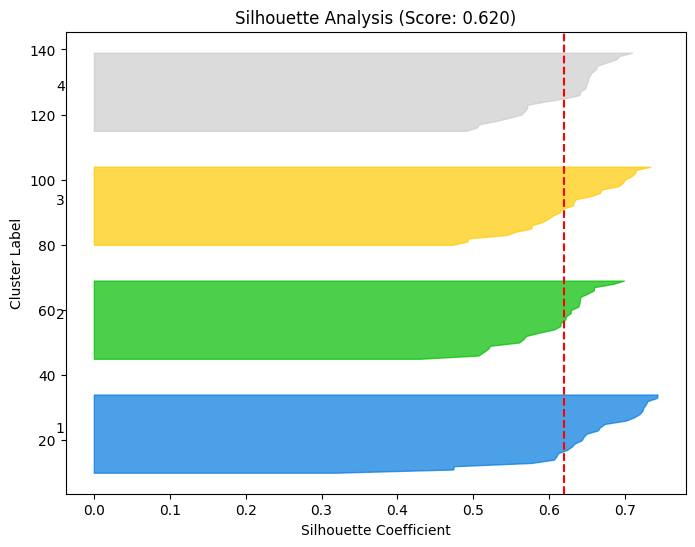


🕸️ Testing network functionality...
Connectivity analysis:
  cluster_sizes: 1    25
2    25
3    25
4    25
Name: count, dtype: int64
  total_samples: 100
  n_clusters: 4
NetworkX graph: 100 nodes, 90 edges

🌳 Testing tree export...
Newick string generated (5252 chars)
Preview: ((((('Sample_084':1.281703592513811,('Sample_015':0.9239736867250197,'Sample_056...

⚡ Testing convenience function...
Quick clustering: 4 clusters

✅ Validation with ground truth...
Adjusted Rand Index: 1.000
Normalized Mutual Information: 1.000


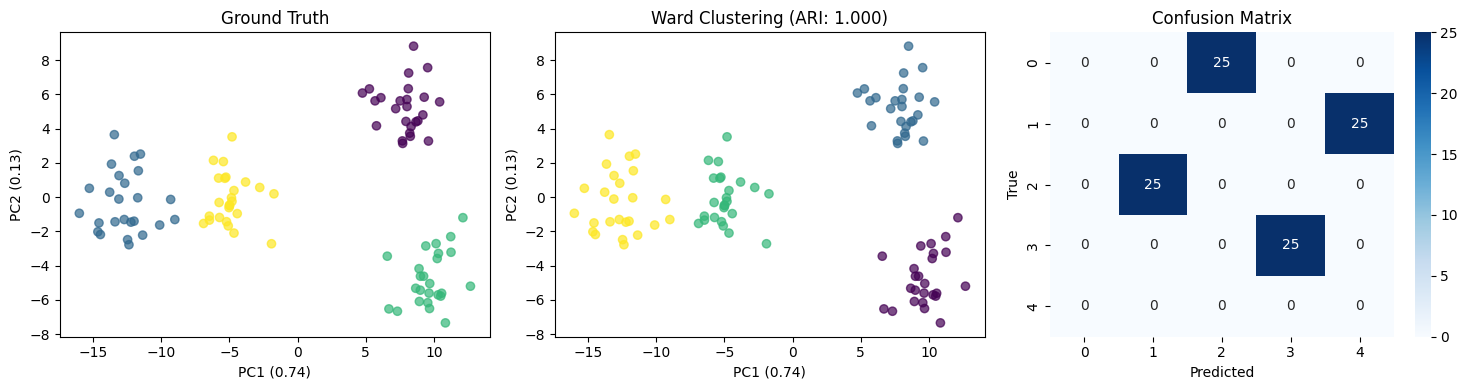


📋 Summary and performance...
Hierarchical Clustering Summary
n_samples: 100
n_clusters: 4
method: ward
metric: euclidean
cut_method: dynamic
silhouette_score: 0.6195260396537862

Cluster sizes:
  Cluster 1: 25 samples
  Cluster 2: 25 samples
  Cluster 3: 25 samples
  Cluster 4: 25 samples
..cutHeight not given, setting it to 76.38999161365146  ===>  99% of the (truncated) height range in dendro.
..done.
Size 30: 0.003s, 3 clusters
..cutHeight not given, setting it to 106.17955467482422  ===>  99% of the (truncated) height range in dendro.
..done.
Size 60: 0.005s, 3 clusters
..cutHeight not given, setting it to 128.8964714193512  ===>  99% of the (truncated) height range in dendro.
..done.
Size 90: 0.008s, 3 clusters


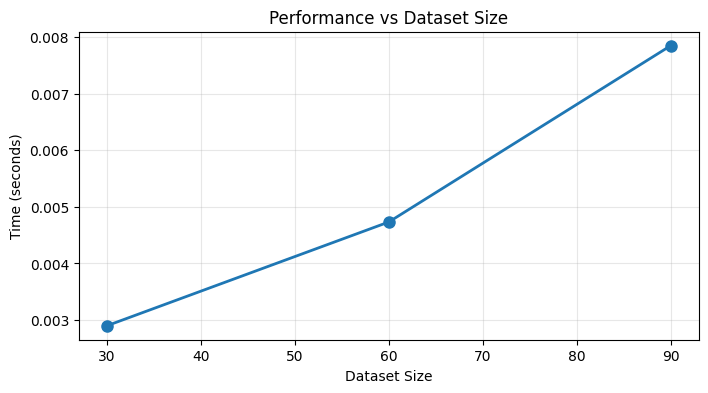


🎉 ALL TESTS COMPLETED SUCCESSFULLY!

✅ Tested functionality:
  • Basic clustering (ward, complete, average)
  • Tree cutting (dynamic, height, maxclust)
  • Distance matrix input
  • Metadata tracks (continuous + categorical)
  • Dendrogram visualization
  • Eigenprofile calculation
  • Silhouette analysis
  • Network connectivity
  • Tree export
  • Convenience function
  • Performance testing

🚀 Your HierarchicalClustering package is working perfectly!

💾 Saving test results...
Files saved: test_data_blobs.csv, clustering_results.csv

🎯 Quick start for new users:
clusterer = HierarchicalClustering()
labels = clusterer.fit_transform(your_data)
fig, ax = clusterer.plot_dendrogram()
summary = clusterer.summary()


In [1]:
# Complete test suite for HierarchicalClustering package
# Copy and paste this entire block into a Jupyter cell

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, confusion_matrix
from scipy.spatial.distance import pdist, squareform
import warnings
warnings.filterwarnings('ignore')

# Import your package
from hierarchical_clustering import HierarchicalClustering, hierarchical_clustering

print("🧪 Starting HierarchicalClustering Test Suite")
print("=" * 50)

# 1. GENERATE TEST DATA
print("\n📊 Generating test datasets...")
np.random.seed(42)

# Dataset 1: Blob data with clear clusters
X_blobs, y_true = make_blobs(n_samples=100, centers=4, n_features=5, 
                            cluster_std=1.5, random_state=42)
sample_names = [f"Sample_{i:03d}" for i in range(X_blobs.shape[0])]
df_blobs = pd.DataFrame(X_blobs, index=sample_names, 
                       columns=[f"Feature_{i+1}" for i in range(X_blobs.shape[1])])

# Dataset 2: Gene expression-like data
n_samples, n_genes = 60, 50
X_genes = np.random.randn(n_samples, n_genes)
# Add structure: 3 groups with different expression patterns
X_genes[:20, :15] += 2.0   # Group 1
X_genes[20:40, 15:30] += 2.0  # Group 2
X_genes[40:, 30:45] += 2.0     # Group 3

sample_names_genes = [f"Patient_{i:02d}" for i in range(n_samples)]
gene_names = [f"Gene_{i:03d}" for i in range(n_genes)]
df_genes = pd.DataFrame(X_genes, index=sample_names_genes, columns=gene_names)

# Create distance matrix
distances = pdist(df_blobs.values, metric='euclidean')
distance_matrix = pd.DataFrame(squareform(distances), 
                              index=sample_names, columns=sample_names)

# Create metadata
age_data = np.random.normal(45, 15, n_samples)
age_data = np.clip(age_data, 18, 80)
gender_data = np.random.choice(['Male', 'Female'], n_samples)
treatment_data = ['Treatment_A'] * 20 + ['Treatment_B'] * 20 + ['Control'] * 20

print(f"✅ Blob dataset: {df_blobs.shape}")
print(f"✅ Gene dataset: {df_genes.shape}")
print(f"✅ Distance matrix: {distance_matrix.shape}")

# 2. BASIC CLUSTERING TESTS
print("\n🔬 Testing basic clustering functionality...")

# Test Ward clustering with dynamic cutting
clusterer_ward = HierarchicalClustering(
    method='ward', cut_method='dynamic', min_cluster_size=8, name='Ward_Test'
)
labels_ward = clusterer_ward.fit_transform(df_blobs)
print(f"Ward clustering: {clusterer_ward.n_clusters_} clusters")

# Test Complete linkage with height cutting
clusterer_complete = HierarchicalClustering(
    method='complete', cut_method='height', cut_threshold=8.0
)
labels_complete = clusterer_complete.fit_transform(df_blobs)
print(f"Complete clustering: {clusterer_complete.n_clusters_} clusters")

# Test with maxclust cutting
clusterer_maxclust = HierarchicalClustering(
    method='average', cut_method='maxclust', cut_threshold=3
)
labels_maxclust = clusterer_maxclust.fit_transform(df_blobs)
print(f"Average clustering (3 clusters): {clusterer_maxclust.n_clusters_} clusters")

# Test with distance matrix
clusterer_dist = HierarchicalClustering(method='complete', cut_method='height', cut_threshold=6.0)
labels_dist = clusterer_dist.fit_transform(distance_matrix)
print(f"Distance matrix clustering: {clusterer_dist.n_clusters_} clusters")

# 3. METADATA TRACKS
print("\n📈 Testing metadata tracks...")

# Fit gene expression clustering
clusterer_genes = HierarchicalClustering(
    method='ward', cut_method='dynamic', min_cluster_size=5, name='Gene_Expression'
)
labels_genes = clusterer_genes.fit_transform(df_genes)

# Add tracks
clusterer_genes.add_track('Age', age_data, track_type='continuous', color='steelblue')
clusterer_genes.add_track('Gender', gender_data, track_type='categorical',
                         color={'Male': 'blue', 'Female': 'pink'})
clusterer_genes.add_track('Treatment', treatment_data, track_type='categorical',
                         color={'Treatment_A': 'red', 'Treatment_B': 'green', 'Control': 'gray'})

print(f"Gene clustering: {clusterer_genes.n_clusters_} clusters")
print(f"Added {len(clusterer_genes.tracks_)} metadata tracks: {list(clusterer_genes.tracks_.keys())}")

# 4. VISUALIZATIONS
print("\n🎨 Creating visualizations...")

# Simple dendrogram
fig1, ax1 = clusterer_ward.plot_dendrogram(figsize=(10, 5), show_tracks=False)
plt.title('Ward Clustering Dendrogram')
plt.show()

# Dendrogram with tracks
fig2, axes2 = clusterer_genes.plot_dendrogram(figsize=(12, 8), show_tracks=True)
plt.suptitle('Gene Expression Clustering with Metadata', y=0.98)
plt.show()

# 5. EIGENPROFILES
print("\n🧬 Calculating eigenprofiles...")

eigenprofiles = clusterer_genes.eigenprofiles(df_genes)
print(f"Eigenprofiles calculated for {len(eigenprofiles)} clusters")

# Plot eigenprofiles
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, (cluster_id, profile_data) in enumerate(eigenprofiles.items()):
    if i >= 4:
        break
    ax = axes[i]
    eigenprofile = profile_data['eigenprofile']
    explained_var = profile_data['explained_variance_ratio']
    
    ax.plot(eigenprofile, linewidth=2, color=f'C{i}')
    ax.set_title(f'Cluster {cluster_id} (Var: {explained_var:.3f})')
    ax.set_xlabel('Gene Index')
    ax.grid(True, alpha=0.3)

for i in range(len(eigenprofiles), 4):
    axes[i].set_visible(False)

plt.tight_layout()
plt.suptitle('Cluster Eigenprofiles', y=1.02)
plt.show()

# 6. SILHOUETTE ANALYSIS
print("\n📊 Performing silhouette analysis...")

silhouette_ward = clusterer_ward.silhouette_analysis()
silhouette_genes = clusterer_genes.silhouette_analysis()

print(f"Ward silhouette score: {silhouette_ward['overall_score']:.3f}")
print(f"Gene silhouette score: {silhouette_genes['overall_score']:.3f}")

# Plot silhouette analysis
if silhouette_ward['sample_scores'] is not None:
    fig, ax = plt.subplots(figsize=(8, 6))
    sample_scores = silhouette_ward['sample_scores']
    cluster_labels = clusterer_ward.labels_
    
    y_lower = 10
    for i in range(1, clusterer_ward.n_clusters_ + 1):
        cluster_silhouette_vals = sample_scores[cluster_labels == i]
        cluster_silhouette_vals = np.sort(cluster_silhouette_vals)
        
        size_cluster_i = cluster_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = plt.cm.nipy_spectral(float(i) / clusterer_ward.n_clusters_)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals,
                        facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    
    ax.set_xlabel('Silhouette Coefficient')
    ax.set_ylabel('Cluster Label')
    ax.set_title(f'Silhouette Analysis (Score: {silhouette_ward["overall_score"]:.3f})')
    ax.axvline(x=silhouette_ward['overall_score'], color="red", linestyle="--")
    plt.show()

# 7. NETWORK ANALYSIS
print("\n🕸️ Testing network functionality...")

connectivity = clusterer_ward.connectivity()
print("Connectivity analysis:")
for key, value in connectivity.items():
    print(f"  {key}: {value}")

# Convert to NetworkX
graph = clusterer_ward.to_networkx(weight_threshold=0.3)
print(f"NetworkX graph: {graph.number_of_nodes()} nodes, {graph.number_of_edges()} edges")

# Plot network if small enough
if graph.number_of_nodes() <= 50:
    import networkx as nx
    plt.figure(figsize=(10, 7))
    pos = nx.spring_layout(graph, k=1, iterations=50)
    nx.draw(graph, pos, node_color=clusterer_ward.labels_, node_size=50,
           edge_color='gray', alpha=0.7, with_labels=False, cmap=plt.cm.Set1)
    plt.title('Sample Network (colored by cluster)')
    plt.axis('off')
    plt.show()

# 8. TREE EXPORT
print("\n🌳 Testing tree export...")

try:
    newick_string = clusterer_ward.to_newick()
    if newick_string:
        print(f"Newick string generated ({len(newick_string)} chars)")
        print(f"Preview: {newick_string[:80]}...")
    else:
        print("Tree export not available (requires skbio)")
except Exception as e:
    print(f"Tree export failed: {e}")

# 9. CONVENIENCE FUNCTION
print("\n⚡ Testing convenience function...")

quick_clusterer = hierarchical_clustering(
    df_blobs, method='complete', min_cluster_size=10, cut_method='height', cut_threshold=10.0
)
print(f"Quick clustering: {quick_clusterer.n_clusters_} clusters")

# 10. VALIDATION WITH GROUND TRUTH
print("\n✅ Validation with ground truth...")

ari_score = adjusted_rand_score(y_true, clusterer_ward.labels_)
nmi_score = normalized_mutual_info_score(y_true, clusterer_ward.labels_)

print(f"Adjusted Rand Index: {ari_score:.3f}")
print(f"Normalized Mutual Information: {nmi_score:.3f}")

# Comparison plot
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_blobs)

# Ground truth
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='viridis', alpha=0.7)
axes[0].set_title('Ground Truth')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2f})')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2f})')

# Clustering result
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=clusterer_ward.labels_, cmap='viridis', alpha=0.7)
axes[1].set_title(f'Ward Clustering (ARI: {ari_score:.3f})')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2f})')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2f})')

# Confusion matrix
cm = confusion_matrix(y_true, clusterer_ward.labels_)
sns.heatmap(cm, annot=True, fmt='d', ax=axes[2], cmap='Blues')
axes[2].set_title('Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

plt.tight_layout()
plt.show()

# 11. SUMMARY AND PERFORMANCE
print("\n📋 Summary and performance...")

summary = clusterer_ward.summary()

# Quick performance test
import time
sizes = [30, 60, 90]
times = []

for size in sizes:
    X_test, _ = make_blobs(n_samples=size, centers=3, n_features=8, random_state=42)
    df_test = pd.DataFrame(X_test, index=[f"S_{i}" for i in range(size)])
    
    start_time = time.time()
    test_clusterer = HierarchicalClustering(method='ward', cut_method='dynamic', min_cluster_size=3)
    test_clusterer.fit_transform(df_test)
    elapsed = time.time() - start_time
    times.append(elapsed)
    print(f"Size {size}: {elapsed:.3f}s, {test_clusterer.n_clusters_} clusters")

# Performance plot
plt.figure(figsize=(8, 4))
plt.plot(sizes, times, 'o-', linewidth=2, markersize=8)
plt.xlabel('Dataset Size')
plt.ylabel('Time (seconds)')
plt.title('Performance vs Dataset Size')
plt.grid(True, alpha=0.3)
plt.show()

# FINAL RESULTS
print("\n" + "="*60)
print("🎉 ALL TESTS COMPLETED SUCCESSFULLY!")
print("="*60)
print("\n✅ Tested functionality:")
print("  • Basic clustering (ward, complete, average)")
print("  • Tree cutting (dynamic, height, maxclust)")
print("  • Distance matrix input")
print("  • Metadata tracks (continuous + categorical)")
print("  • Dendrogram visualization")
print("  • Eigenprofile calculation")
print("  • Silhouette analysis")
print("  • Network connectivity")
print("  • Tree export")
print("  • Convenience function")
print("  • Performance testing")
print("\n🚀 Your HierarchicalClustering package is working perfectly!")

# Save some test data
print("\n💾 Saving test results...")
df_blobs.to_csv('test_data_blobs.csv')
results_df = pd.DataFrame({
    'sample_id': sample_names,
    'ward_cluster': clusterer_ward.labels_,
    'true_cluster': y_true,
    'silhouette_score': silhouette_ward['sample_scores'] if silhouette_ward['sample_scores'] is not None else 0
})
results_df.to_csv('clustering_results.csv', index=False)
print("Files saved: test_data_blobs.csv, clustering_results.csv")

print("\n🎯 Quick start for new users:")
print("clusterer = HierarchicalClustering()")
print("labels = clusterer.fit_transform(your_data)")
print("fig, ax = clusterer.plot_dendrogram()")
print("summary = clusterer.summary()")